In [4]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from deskew import determine_skew
from skimage.transform import rotate
import PyPDF2
import os

In [ ]:
img = cv2.imread("Sample/S__33579010.jpg")
# reshape
img = cv2.resize(img, (1500, 1000))
img = img[0:600, 1000:]
# # random rotate
# img = rotate(img, 90, resize=True, mode='edge')

# normalize
pre_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
# deskew
angle = determine_skew(pre_img)
pre_img = rotate(pre_img, angle, resize=True, mode='edge')
pre_img = (pre_img * 255).astype(np.uint8)
print(f"angle: {angle}")
# noise removal
pre_img = cv2.fastNlMeansDenoising(pre_img, None, 10, 7, 21)
# gray
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2GRAY)
# threshold
# th, pre_img = cv2.threshold(pre_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# # thinning and skeletonize
# kernel = np.ones((1, 1 ), np.uint8)
# pre_img = cv2.erode(pre_img, kernel, iterations=1)


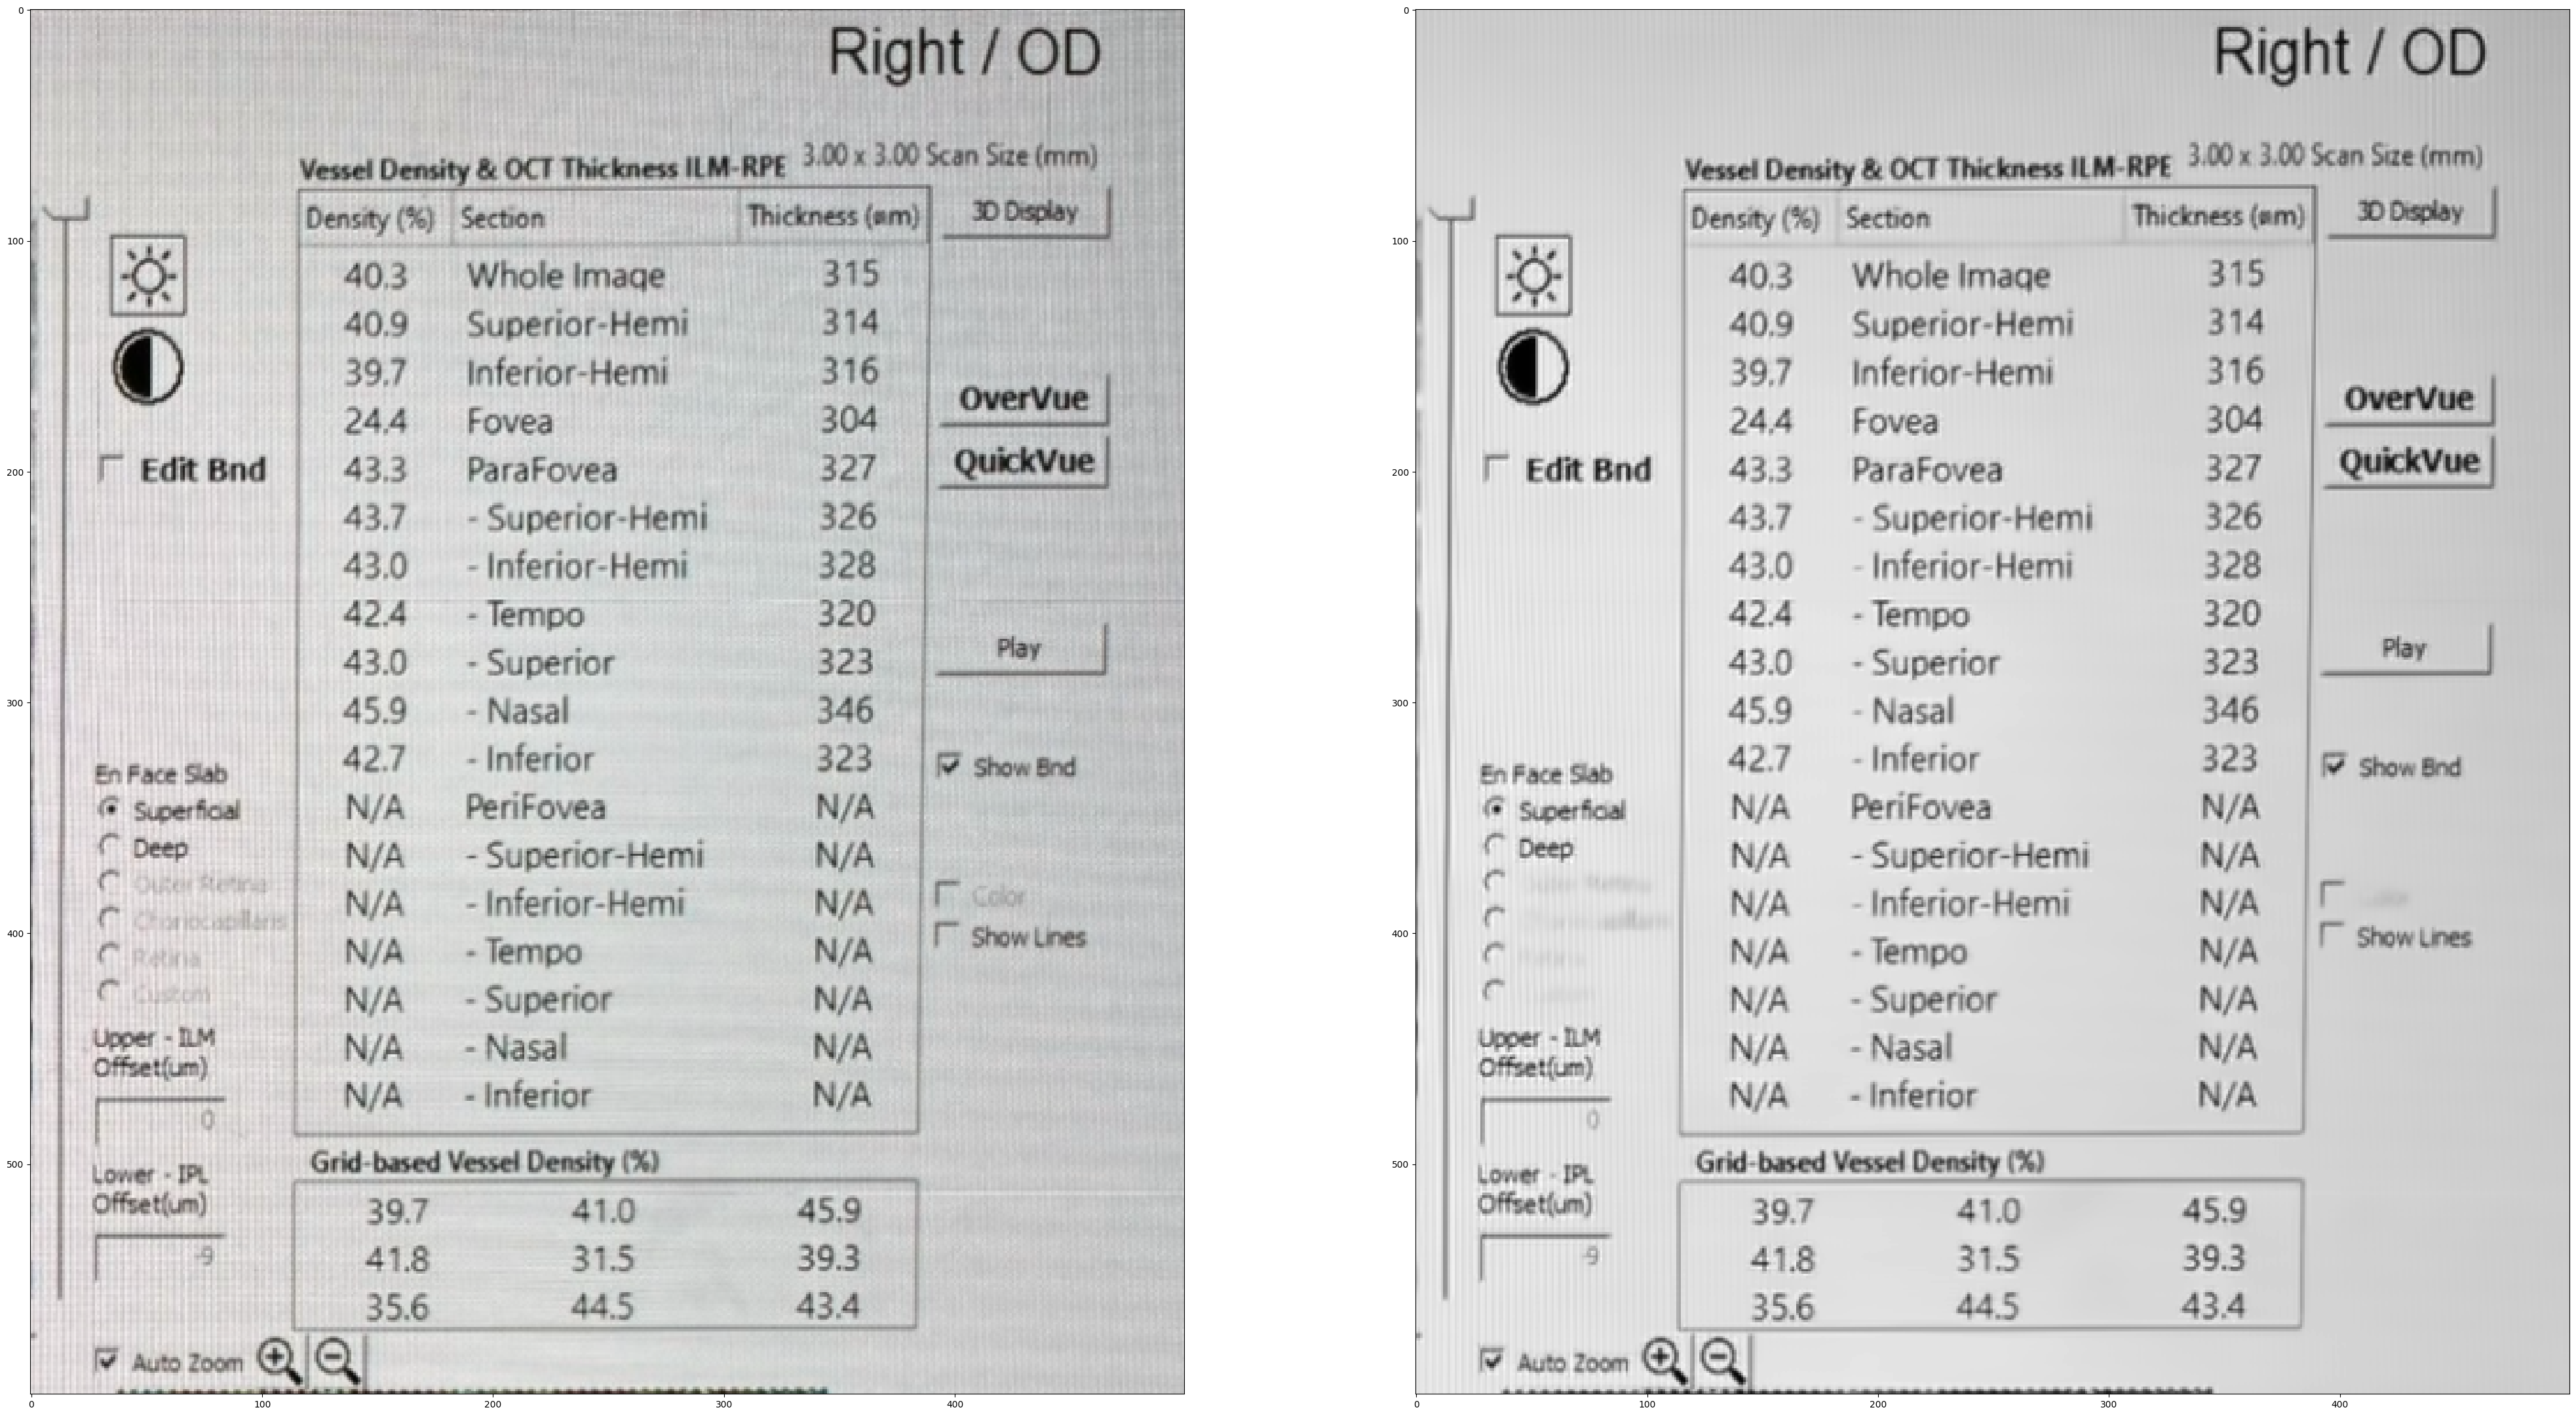

In [195]:
fig, axs = plt.subplots(1, 2, figsize=(50, 50))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(pre_img, cmap='gray')

In [196]:
reader = easyocr.Reader(['en'], gpu=True, )
results_normal = reader.readtext(img)
results_pre = reader.readtext(pre_img)

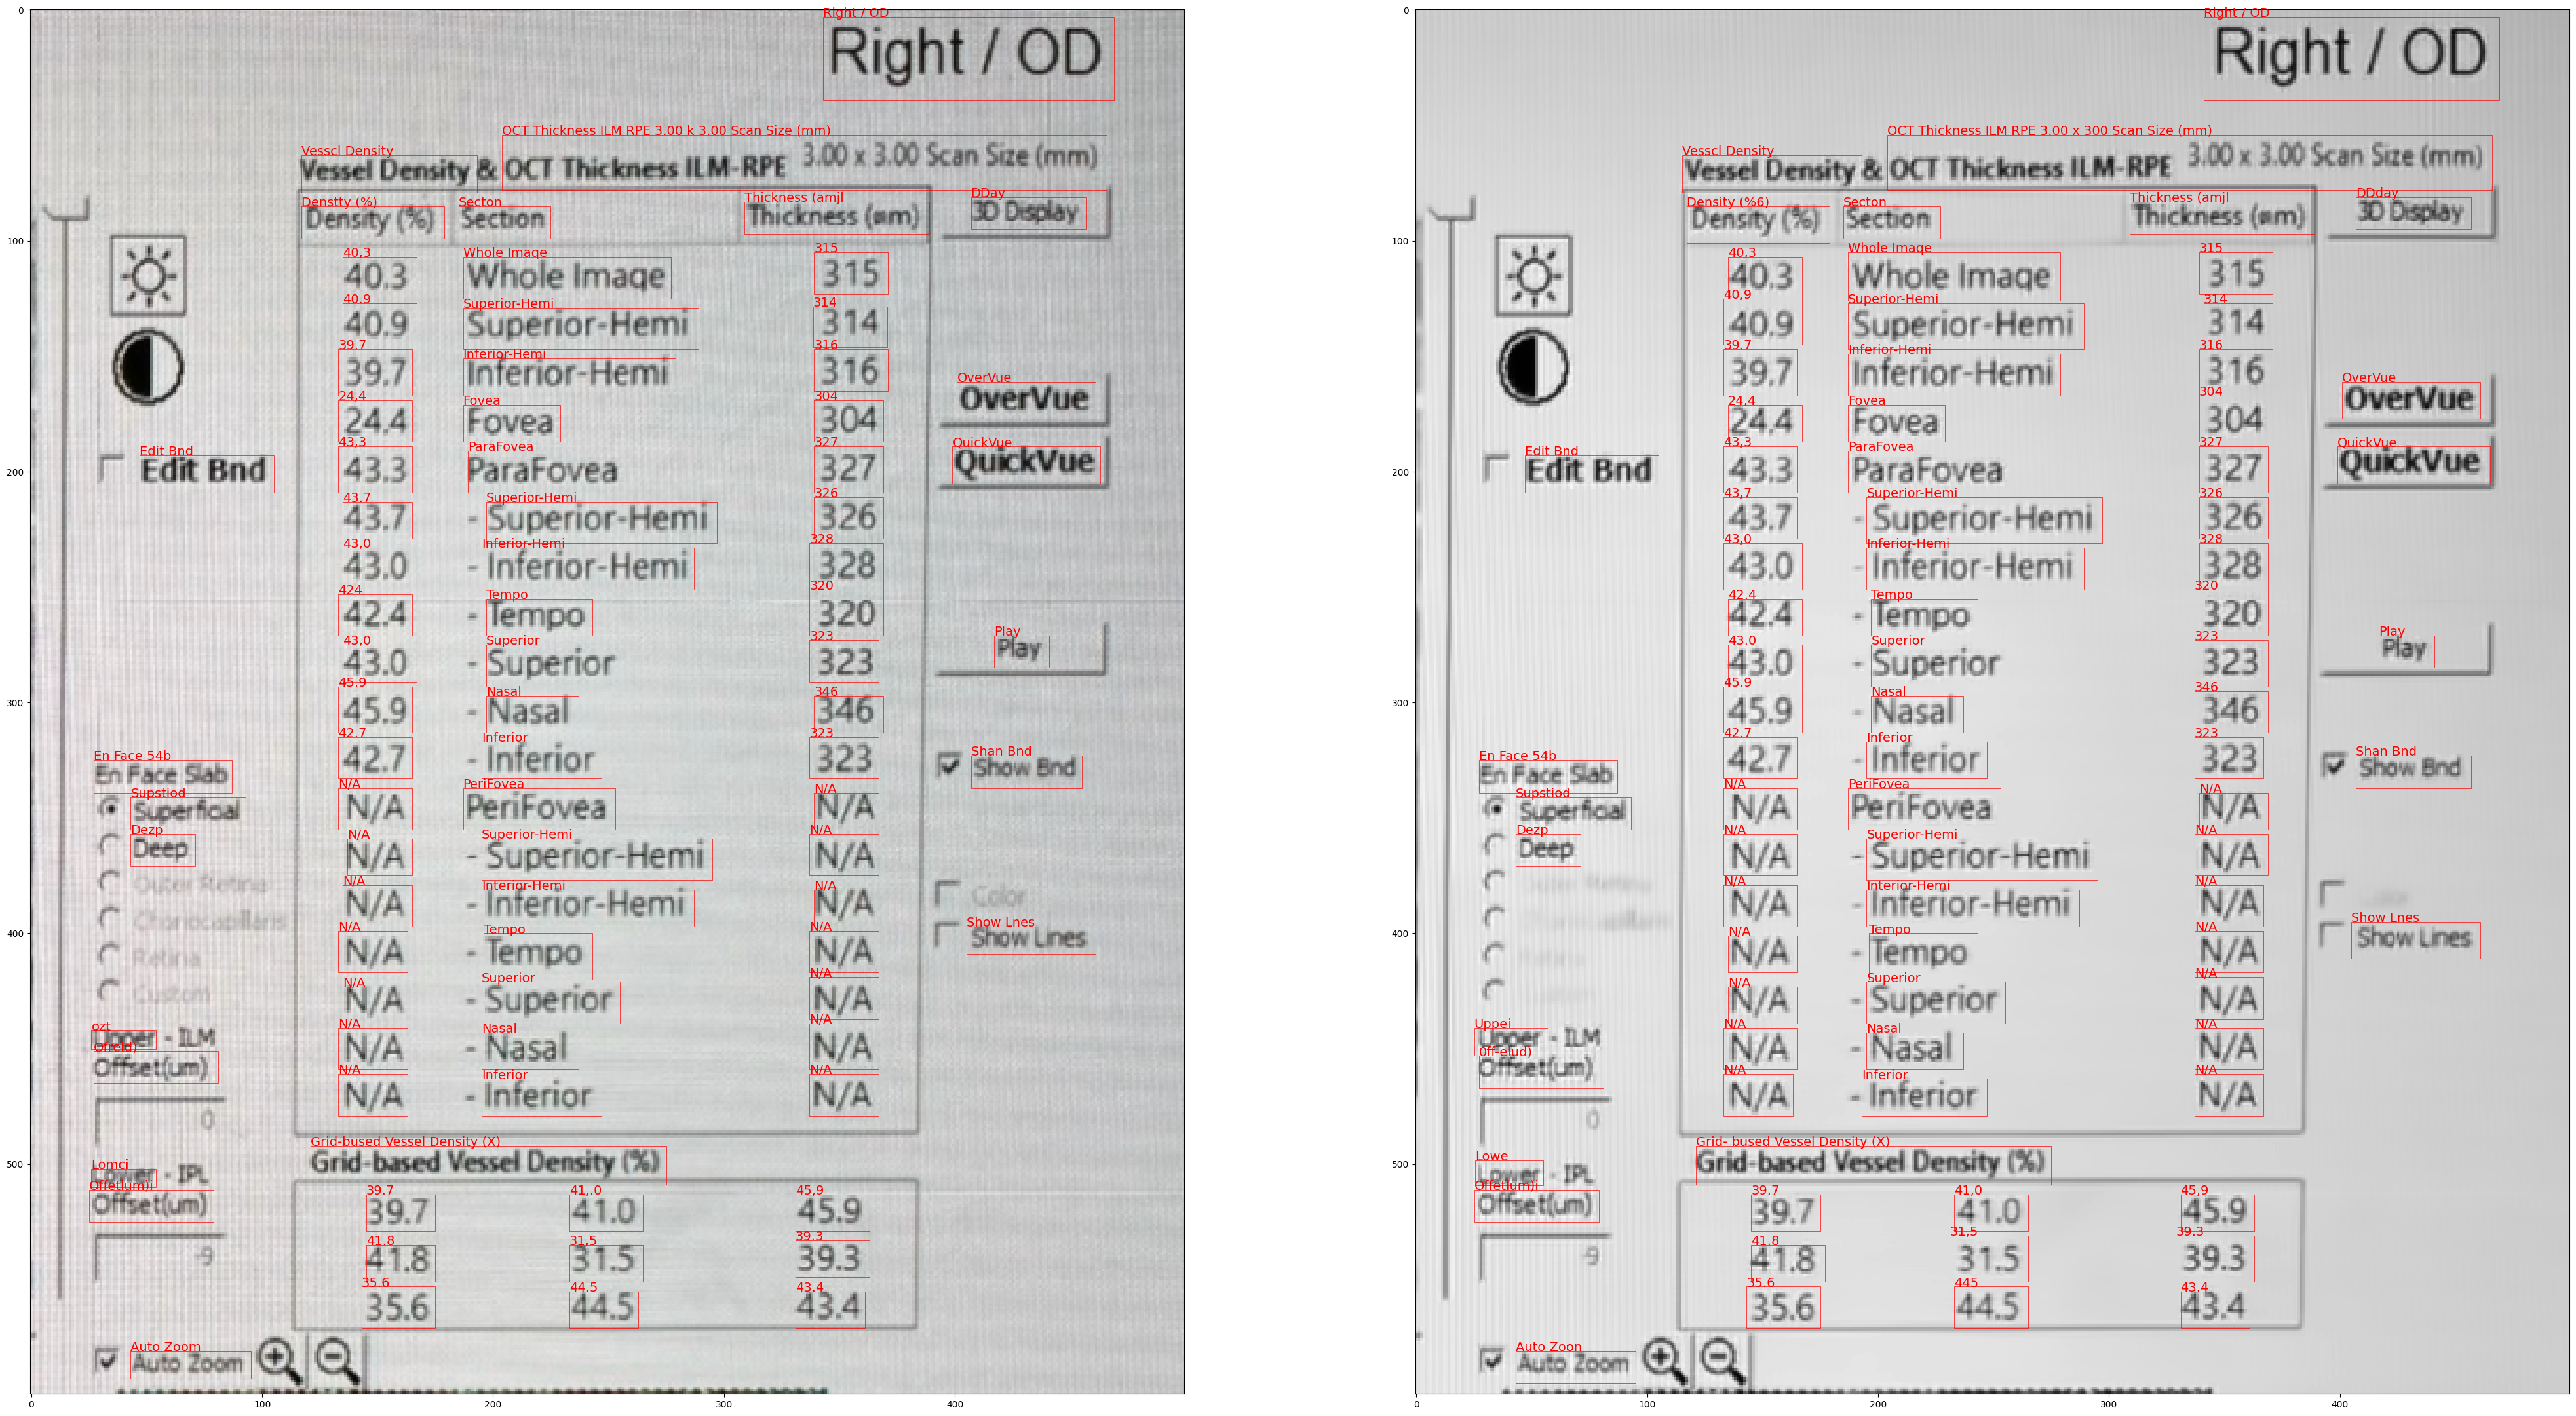

In [197]:
#compare results from normal and preprocessed image
fig, axs = plt.subplots(1, 2, figsize=(50, 50))
axs[0].imshow(img, cmap='gray')
for result in results_normal:
    bbox = result[0]
    text = result[1]
    patch = patches.Rectangle((bbox[0][0], bbox[0][1]), bbox[2][0]-bbox[-1][0], bbox[-1][1]-bbox[0][1], linewidth=0.5, edgecolor='r', facecolor='none')
    axs[0].add_patch(patch)
    axs[0].text(bbox[0][0], bbox[0][1], text, fontsize=14, color='r')

axs[1].imshow(pre_img, cmap='gray')
for result in results_pre:
    bbox = result[0]
    text = result[1]
    patch = patches.Rectangle((bbox[0][0], bbox[0][1]), bbox[2][0]-bbox[-1][0], bbox[-1][1]-bbox[0][1], linewidth=0.5, edgecolor='r', facecolor='none')
    axs[1].add_patch(patch)
    axs[1].text(bbox[0][0], bbox[0][1], text, fontsize=14, color='r')
plt.show()

PDF file

In [5]:
# creating a pdf file object
path = 'Sample\GCA RE.pdf'
pdfFileObj = open(path, 'rb')
 
# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)
 
# printing number of pages in pdf file
print(len(pdfReader.pages))
 
# creating a page object
pageObj = pdfReader.pages[0]
 
# extracting text from page
pageObj.extract_text()

1


"3/17/2022\n CZMI\nOS OD Ganglion Cell OU Analysis: Macular Cube 512x128Signal Strength:Exam Time:Exam Date:\nTechnician:Gender:DOB:ID:Name:\n10/108:09 AM3/17/2022xxx, xxx\n12345678\n1/1/2000\nFemale\nOperator, Cirrus8:14 AM\n10/10OD OS\nSerial Number: 5000-19931 5000-19931\nOS Sectors OD Sectors\nOD Horizontal B-Scan OS Horizontal B-ScanOS Thickness Map\nOS Deviation Map\nOD Thickness Map\nOD Deviation Map\nFovea: 247, 69 Fovea: 296, 80\n69 BScan: 80 BScan:\nDoctor's SignatureOCT5000\nSW Ver: 11.0.0.29946\nCopyright  2018\nCarl Zeiss  Meditec,  Inc\nAll Rights  Reserved\nPage 1 of 1Comments"

In [6]:
from pathlib import Path
from typing import Iterable, Any

from pdfminer.high_level import extract_pages


def show_ltitem_hierarchy(o: Any, depth=0):
    """Show location and text of LTItem and all its descendants"""
    if depth == 0:
        print('element                        x1  y1  x2  y2   text')
        print('------------------------------ --- --- --- ---- -----')

    print(
        f'{get_indented_name(o, depth):<30.30s} '
        f'{get_optional_bbox(o)} '
        f'{get_optional_text(o)}'
    )

    if isinstance(o, Iterable):
        for i in o:
            show_ltitem_hierarchy(i, depth=depth + 1)


def get_indented_name(o: Any, depth: int) -> str:
    """Indented name of LTItem"""
    return '  ' * depth + o.__class__.__name__


def get_optional_bbox(o: Any) -> str:
    """Bounding box of LTItem if available, otherwise empty string"""
    if hasattr(o, 'bbox'):
        return ''.join(f'{i:<4.0f}' for i in o.bbox)
    return ''


def get_optional_text(o: Any) -> str:
    """Text of LTItem if available, otherwise empty string"""
    if hasattr(o, 'get_text'):
        return o.get_text().strip()
    return ''

pages = extract_pages(path)
show_ltitem_hierarchy(pages)

element                        x1  y1  x2  y2   text
------------------------------ --- --- --- ---- -----
generator                       
  LTPage                       0   0   612 792  
    LTTextBoxHorizontal        79  742 103 750  Name:
      LTTextLineHorizontal     79  742 103 750  Name:
        LTChar                 79  742 85  750  N
        LTChar                 85  742 90  750  a
        LTChar                 90  742 97  750  m
        LTChar                 97  742 101 750  e
        LTChar                 101 742 103 750  :
        LTAnno                  
    LTTextBoxHorizontal        127 740 160 749  xxx, xxx
      LTTextLineHorizontal     127 740 160 749  xxx, xxx
        LTChar                 127 740 132 749  x
        LTChar                 132 740 137 749  x
        LTChar                 137 740 141 749  x
        LTChar                 141 740 143 749  ,
        LTChar                 143 740 146 749  
        LTChar                 146 740 150 749  x
       

In [7]:
import pdfminer
from pdfminer.image import ImageWriter
from pdfminer.high_level import extract_pages

In [2]:
class ImageWriter:

    def __init__(self, outdir):
        self.outdir = outdir
        if not os.path.exists(self.outdir):
            os.makedirs(self.outdir)
        return

    def export_image(self, image):
        stream = image.stream
        filters = stream.get_filters()
        (width, height) = image.srcsize
        if len(filters) == 1 and filters[0][0] in LITERALS_DCT_DECODE:
            ext = '.jpg'
        elif (image.bits == 1 or
              image.bits == 8 and image.colorspace in (LITERAL_DEVICE_RGB, LITERAL_DEVICE_GRAY)):
            ext = '.%dx%d.bmp' % (width, height)
        else:
            ext = '.%d.%dx%d.img' % (image.bits, width, height)
        name = image.name+ext
        path = os.path.join(self.outdir, name)
        if ext == '.jpg':
            raw_data = stream.get_rawdata()
            if LITERAL_DEVICE_CMYK in image.colorspace:
                from PIL import Image
                from PIL import ImageChops
                ifp = BytesIO(raw_data)
                i = Image.open(ifp)
                i = ImageChops.invert(i)
                i = i.convert('RGB')
                # i.save(fp, 'JPEG')
                print('pass jpg color')
            else:
                # fp.write(raw_data)
                i = raw_data
                print('pass jpg')
        elif image.bits == 1:
            bmp = BMPWriter(fp, 1, width, height)
            data = stream.get_data()
            i = 0
            width = (width+7)//8
            for y in range(height):
                bmp.write_line(y, data[i:i+width])
                i += width
        elif image.bits == 8:
            bmp = BMPWriter(fp, 24, width, height)
            data = stream.get_data()
            i = 0
            width = width*3
            for y in range(height):
                bmp.write_line(y, data[i:i+width])
                i += width
                print('pass')
        else:
            # fp.write(stream.get_data())
            i = stream.get_data() 
        return i

In [12]:
path = 'Sample\GCA RE.pdf'
pages = list(extract_pages(path))
page = pages[0]

def get_image(layout_object):
    if isinstance(layout_object, pdfminer.layout.LTImage):
        return layout_object
    if isinstance(layout_object, pdfminer.layout.LTContainer):
        for child in layout_object:
            return get_image(child)
    else:
        return None

image_ls = list(filter(bool, map(get_image, page)))

def save_images_from_page(page: pdfminer.layout.LTPage):
    images = list(filter(bool, map(get_image, page)))
    iw = ImageWriter('output_dir')
    for image in images:
        iw.export_image(image)

save_images_from_page(page)

In [14]:
image_ls[0]

<LTImage(Im0) 535.680,722.160,568.800,755.280 (40, 40)>

In [16]:
image = image_ls[0]
stream = image.stream
filters = stream.get_filters()
(width, height) = image.srcsize
image.colorspace
stream.get_rawdata()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x00(\x00(\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x1